### 1.	How does unsqueeze help us to solve certain broadcasting problems?


torch.unsqueeze(input, dim) → Tensor

Returns a new tensor with a dimension of size one inserted at the specified position.

The returned tensor shares the same underlying data with this tensor.

A dim value within the range [-input.dim() - 1, input.dim() + 1) can be used. Negative dim will correspond to unsqueeze() applied at dim = dim + input.dim() + 1.

Parameters

input (Tensor) – the input tensor.

dim (int) – the index at which to insert the singleton dimension

In [ ]:
x = torch.tensor([1, 2, 3, 4])
torch.unsqueeze(x, 0)
torch.unsqueeze(x, 1)

### 2.	How can we use indexing to do the same operation as unsqueeze?


PyTorch you can add a new axis by indexing with None as:

In [ ]:
input = torch.Tensor(2, 4, 3) # input: 2 x 4 x 3
print(input[None].size())
torch.Size([1, 2, 4, 3])
print(input[:, None].size())
torch.Size([2, 1, 4, 3])

### 3.	How do we show the actual contents of the memory used for a tensor?


Get the current memory usage, in bytes, for the chosen device. (deprecated)

In [ ]:
tf.config.experimental.get_memory_usage(
    device
)

In [ ]:
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
  tf.config.experimental.get_memory_usage('GPU:0')

### 4.	When adding a vector of size 3 to a matrix of size 3×3, are the elements of the vector added to each row or each column of the matrix? (Be sure to check your answer by running this code in a notebook.)


We frequently need to multiply a vector by a matrix. This usually means that the matrix is on the left and the vector (written as a column vector) is on the right.

It might help to begin thinking of a matrix in this situation as an "operator," something that alters a vector in a certain way, but is unchanged itself.

This isn't only a good way to think about matrix-vector multiplication, but a handy way to think of a number of concepts you'll encounter later on in math.

Here's a example. We'll multiply the 3 × 1 vector b by the 3 × 3 matrix A to make a new 3 × 1 vector. You'll have to follow all of the subscripts as we multiply matrix A by vector b:

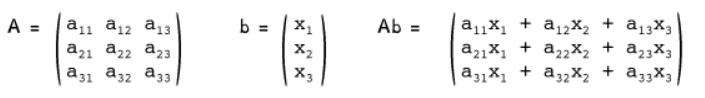

The step-by-step details of how that multiplication was performed are illustrated below, but notice that it's really like taking the dot product of the mth row of the matrix and the vector to get the mth element of the vector.

Each row of the matrix A is multiplied, one element at a time, by the corresponding element of the column vector, and the resulting products are added to give the corresponding row element of the new vector.

(Notice that the result of multiplying a 3×3 matrix with a 3×1 vector is a 3×1 vector.)

Once the first row of the new vector is determined, we move to the second and third rows of the matrix, in turn, to find the second and third elements of the new vector. Notice that each new element of the new 3 × 1 vector is just the dot product of the appropriate row of the matrix with the column vector. See if you can follow it:

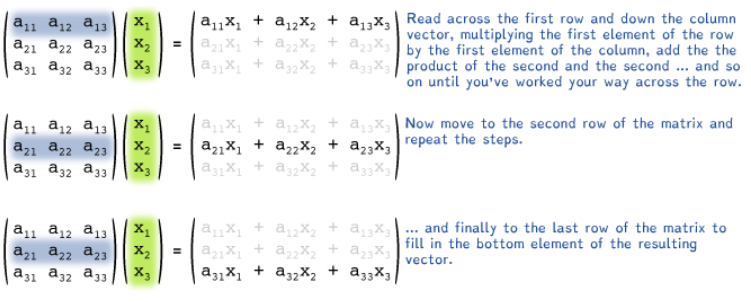

### 5.	Do broadcasting and expand_as result in increased memory use? Why or why not?


I am using NumPy to handle some large data matrices (of around ~50GB in size). The machine where I am running this code has 128GB of RAM so doing simple linear operations of this magnitude shouldn't be a problem memory-wise.

However, I am witnessing a huge memory growth (to more than 100GB) when computing the following code in Python:

In [ ]:
import numpy as np

# memory allocations (everything works fine)
a = np.zeros((1192953, 192, 32), dtype='f8')
b = np.zeros((1192953, 192), dtype='f8')
c = np.zeros((192, 32), dtype='f8')

a[:] = b[:, :, np.newaxis] - c[np.newaxis, :, :] # memory explodes here


Please note that initial memory allocations are done without any problems. However, when I try to perform the subtract operation with broadcasting, the memory grows to more than 100GB. I always thought that broadcasting would avoid making extra memory allocations but now I am not sure if this is always the case.

As such, can someone give some details on why this memory growth is happening,

### 6.	Implement matmul using Einstein summation.

Consider the matrix product C=AB where A∈Rm×n,B∈Rn×p. The Einstein summation notation for this is
cik=aijbjk.
Is there any example from math, physics, engineering, statistics etc. where each term in the sum aijbjk has a meaningful interpretation?

Equivalently, I guess: suppose we did not use Einstein summation notation, and instead defined D∈Rm×n×p as:
Dijk=AijBjk.
Would the elements of D mean anything with respect to A,B,C or the linear transformations represented by these matrices? Obviously Cik=∑jDijk, but what does this mean?

Or suppose, instead of summing over the second index of D to get C, we instead summed over the first index of D to get E∈Rn×p:
Ejk=∑iDijk.
Obviously this cannot be represented in Einstein notation. So does this not have meaning as a tensor contraction, and unlikely to have a physical interpretation?

Edit: For the powers of adjacency matrices (eg C=A2=AA), the terms do have an interpretation. Iff aijbjk=1 (not using Einstein notation), then there is a path from node i to node k through node j.

### 7.	What does a repeated index letter represent on the lefthand side of einsum?


In [ ]:
import numpy as np
C = np.einsum("ij,jk->ki", A, B)

The signature string 'i,ij->i' is the key here and needs a little bit of explaining. You can think of it in two halves. On the left-hand side (left of the ->) we've labelled the two input arrays. To the right of ->, we've labelled the array we want to end up with.

Here is what happens next:

A has one axis; we've labelled it i. And B has two axes; we've labelled axis 0 as i and axis 1 as j.

By repeating the label i in both input arrays, we are telling einsum that these two axes should be multiplied together. In other words, we're multiplying array A with each column of array B, just like A[:, np.newaxis] * B does.

Notice that j does not appear as a label in our desired output; we've just used i (we want to end up with a 1D array). By omitting the label, we're telling einsum to sum along this axis. In other words, we're summing the rows of the products, just like .sum(axis=1) does.

That's basically all you need to know to use einsum. It helps to play about a little; if we leave both labels in the output, 'i,ij->ij', we get back a 2D array of products (same as A[:, np.newaxis] * B). If we say no output labels, 'i,ij->, we get back a single number (same as doing (A[:, np.newaxis] * B).sum()).

The great thing about einsum however, is that it does not build a temporary array of products first; it just sums the products as it goes. This can lead to big savings in memory use.

### 8.	What are the three rules of Einstein summation notation? Why?


There are essentially three rules of Einstein summation notation, namely:

   *  Repeated indices are implicitly summed over.

   *  Each index can appear at most twice in any term.

   * Each term must contain identical non-repeated indices.

### 9.	What are the forward pass and backward pass of a neural network?


The "forward pass" refers to calculation process, values of the output layers from the inputs data. It's traversing through all neurons from first to last layer.

A loss function is calculated from the output values.

And then "backward pass" refers to process of counting changes in weights (de facto learning), using gradient descent algorithm (or similar). Computation is made from last layer, backward to the first layer.

Backward and forward pass makes together one "iteration".

During one iteration, you usually pass a subset of the data set, which is called "mini-batch" or "batch" (however, "batch" can also mean an entire set, hence the prefix "mini")

"Epoch" means passing the entire data set in batches.
One epoch contains (number_of_items / batch_size) iterations

### 10.	Why do we need to store some of the activations calculated for intermediate layers in the forward pass?


Because for the new epoch it helps to learn the pattern better that the previuos epoch

### 11.	What is the downside of having activations with a standard deviation too far away from 1?

### 12.	How can weight initialization help avoid this problem?


The whole point of that initialisation scheme (sometimes called "Xavier initialisation") is to mitigate the problem of disappearing gradients caused by the form of many activation functions.

Consider the common sigmoidal activation function s(z)=11+e−z=ezez+1. Its gradient σ′(z)=s(z)[1−s(z)] approaches 0 away from its mean of 0:
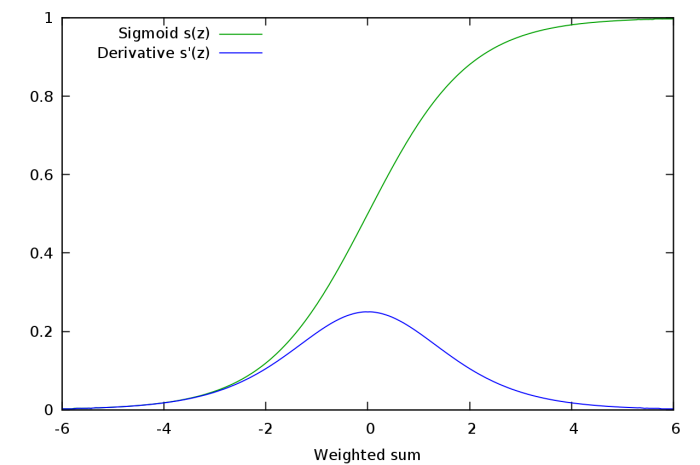

f this happens, it is one of many situations where a vanishing gradient can occur. And it will occur if the input to the activation function z=wTx lies far enough away from its mean that the gradient of its activation s′(z) is 0.


Let's say your inputs xi have already been scaled to be centred at 0 mean with variance 1. This means these input values xi will typically lie within the range [−2,+2]. (To see this, consider that for a standard Normal approximation, samples will lie within ±2 standard deviations from the mean 95% of the time.)

Making a few simplifying i.i.d. assumptions and recalling that the inputs have unit variance, the variance of the activation inputs zi works out as Var(zi)=nVar(wi).

So by initialising the weights wi with samples of variance 1n√, activation inputs have Var(zi)=1, which keeps them away from regions where the gradient might vanish.